<a href="https://colab.research.google.com/github/annievu22/CovidProject/blob/main/AirBnB_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import files
#uploaded = files.upload()        ---> Upload file directly

import pandas as pd

file_path = '/content/drive/My Drive/AirBnB_data.csv'
df = pd.read_csv(file_path)


/tmp/ipython-input-1-1554653533.py:7: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [2]:
#Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Trả về data mẫu
df.head()
#  df.head() : mặc định 5 rows đầu
#  df.head (10) :  trả về 10 rows đầu

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.columns #Show all the cols name

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

## **1. Checking missing values**

In [7]:
#Checking missing values
print(df.isnull().sum())

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [8]:
#Checking the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [9]:
#Format data type of last review: object (string) --> date
df['last review'] = pd.to_datetime(df['last review'], errors = 'coerce') #Phần nào error (NULL/ khác thường) thì Pandas sẽ ép (coerce) thành NaT (Not a Time — giống NaN nhưng cho thời gian).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

## **2. Handling missing values (from the most to the least)**

In [10]:
#1. 'last review'  -->  Replace những NaN trong last review = ngày minimum date

df.fillna({'last review' : df['last review'].min()}, inplace = True)
## inplace = True: thay đổi trực tiếp trên bảng dữ liệu gốc ; không có inplace = True: tạo ra 1 bảng mới, bảng cũ vẫn giữ nguyên.

print(df.isnull().sum())

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                            0
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [11]:
#2. 'reviews per month'  -->  Replace những NaN trong reviews per month = 0 (vì không có dữ liệu về reviews nghĩa là số reviews = 0)
df.fillna({'reviews per month' : 0}, inplace = True)

print(df.isnull().sum())

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                            0
reviews per month                      0
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [12]:
#3. 'NAME' + 'host name'   -->  Drop NaN
df.dropna(subset = ['NAME', 'host name'], inplace = True)
#df.dropna() : drop NaN của cả bảng ; df.dropna(subset = [ ' ' ] : drop NaN của 1 hoặc nhiều cột

print(df.isnull().sum())

id                                     0
NAME                                   0
host id                                0
host_identity_verified               276
host name                              0
neighbourhood group                   26
neighbourhood                         16
lat                                    8
long                                   8
country                              526
country code                         122
instant_bookable                      96
cancellation_policy                   70
room type                              0
Construction year                    200
price                                239
service fee                          268
minimum nights                       403
number of reviews                    182
last review                            0
reviews per month                      0
review rate number                   314
calculated host listings count       318
availability 365                     420
house_rules     

In [13]:
#4. 'house_rules' + 'license'  --> Drop these vì không dùng tới
df.drop(columns = ['house_rules', 'license'], inplace = True, errors='ignore') #Nếu có inplace = True: không cần gán df mới 'df = '
##df = df.drop(columns = ['house_rules', 'license'], errors = 'ignore') --> Không có inplace = True: phải gán 'df = ' vì tại bảng mới, bảng cũ giữ nguyên

print(df.isnull().sum())

id                                  0
NAME                                0
host id                             0
host_identity_verified            276
host name                           0
neighbourhood group                26
neighbourhood                      16
lat                                 8
long                                8
country                           526
country code                      122
instant_bookable                   96
cancellation_policy                70
room type                           0
Construction year                 200
price                             239
service fee                       268
minimum nights                    403
number of reviews                 182
last review                         0
reviews per month                   0
review rate number                314
calculated host listings count    318
availability 365                  420
dtype: int64


In [14]:
#5. 'price' + 'service fee'   -->   Remove the '$' to avoid the errors + Reformat data type:  object (string) --> float
df['price'] = df['price'].replace('[$,]', '',regex = True).astype(float)

df['service fee'] = df['service fee'].replace('[$,]', '',regex = True).astype(float)
## Giống nhau: df['service fee'] = df['service fee'].str.replace('[$,]', '').astype(float)

# ...df ['price'].str.replace (..) --> .str.replace () : thay giá trị "$" bên trong từng string SIMILAR TO .replace('', '', regex = True)  vs  replace() thôi : tìm string có giá trị bằng '$' để thay luôn
# replace 1 ký tự : replace ('$') vs replace >= 2 ký tự: replace ('[x,y]')

print(df.isnull().sum())

id                                  0
NAME                                0
host id                             0
host_identity_verified            276
host name                           0
neighbourhood group                26
neighbourhood                      16
lat                                 8
long                                8
country                           526
country code                      122
instant_bookable                   96
cancellation_policy                70
room type                           0
Construction year                 200
price                             239
service fee                       268
minimum nights                    403
number of reviews                 182
last review                         0
reviews per month                   0
review rate number                314
calculated host listings count    318
availability 365                  420
dtype: int64


In [15]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


## **3. Remove duplicates**

In [16]:
#Cheking for duplicates

print(len(df)) #Total of rows
print(df.shape) #Total of rows , cols
print(df.duplicated().sum()) #Total of duplicated rows
print(df[df.duplicated()]) #Cụ thể các duplicated rows

101949
(101949, 24)
539
              id                                              NAME  \
102058  35506831    Master Bedroom with private Bathroom & Balcony   
102059  35507383                Cozy 2 br in sunny Fort Greene apt   
102060  35507935               Duplex w/ Terrace @ Box House Hotel   
102061  35508488      Cozy, clean Greenpoint room with yard access   
102062  35509040  2BR XL Loft: Cleaning CDC guidelines implemented   
...          ...                                               ...   
102594   6092437                        Spare room in Williamsburg   
102595   6092990                     Best Location near Columbia U   
102596   6093542                    Comfy, bright room in Brooklyn   
102597   6094094                  Big Studio-One Stop from Midtown   
102598   6094647                              585 sf Luxury Studio   

            host id host_identity_verified            host name  \
102058  55110690425            unconfirmed               UZeyir   
1

In [17]:
#Remove duplicates

df.drop_duplicates(inplace = True) #SIMILAR TO: df = df.drop_duplicates()

print(df.duplicated().sum())

0


## **4. Cleaning typo data**




In [18]:
#Checking for typo data:

df['neighbourhood group'].unique()
df['neighbourhood group'].value_counts()

#Replace correct data:

df['neighbourhood group'] = df['neighbourhood group'].replace({
    'brookln': 'Brooklyn',
    'manhatan': 'Manhattan'
})

df['neighbourhood group'].value_counts()

,count
neighbourhood group,
Manhattan,43279
Brooklyn,41364
Queens,13120
Bronx,2678
Staten Island,943


## **5. Descrptive Statistics**

In [19]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101171.000000,101142.000000,101016.000000,101228.000000,101410,101410.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,625.381008,125.043998,8.113744,27.511854,2018-05-15 21:26:08.721033728,1.163207,3.278558,7.948463,141.164660
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,340.000000,68.000000,2.000000,1.000000,2017-07-30 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-05-23 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,331.609111,66.313374,30.378014,49.549258,NaN,1.683708,1.285369,32.328974,135.419199


## **6. Visualization**

# **a. What is the distribution of listing prices?**

***Answer:***


*   The histogram shows a fairly even distribution of listing prices across different price ranges, indication no particular concentration of listings in any specifc range.  
*   The KDE line helps visualize this even spread more clearly, confirming that the dataset contains listings with a wide variety of prices.



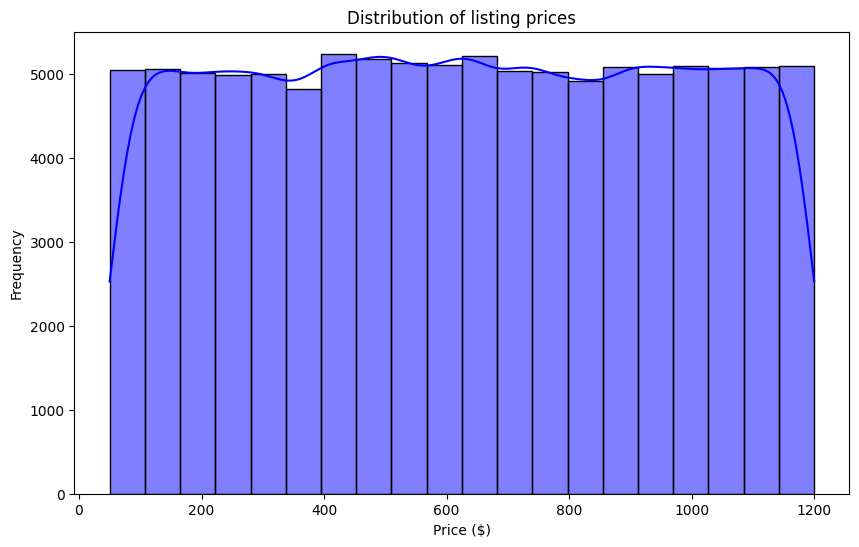

In [20]:
# Histogram
plt.figure(figsize = (10,6))
sns.histplot(df['price'], bins = 20, kde = True, color = 'blue') #kde là đường cong xác suất của data

plt.title('Distribution of listing prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

plt.show()

# **b. How are different room types distributed?**

***Answer:***

*   Entire room/ Apt > Private room > Shared room > Hotel room

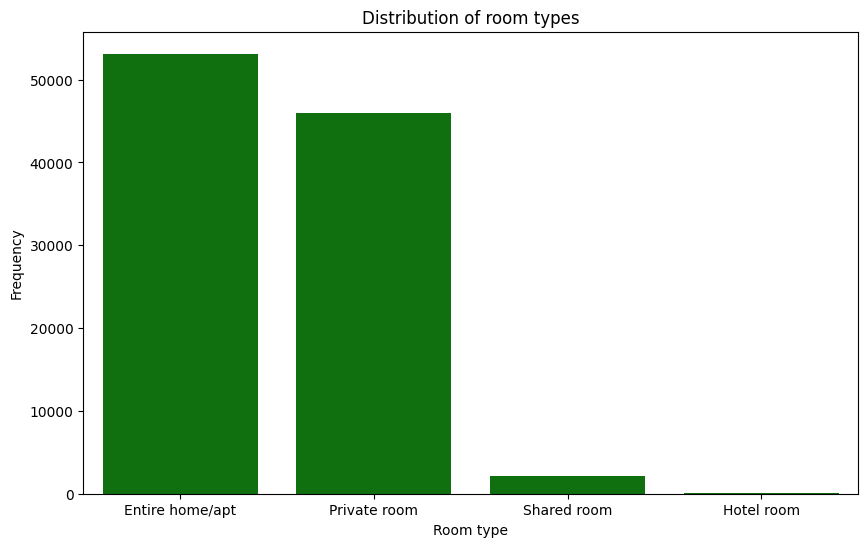

In [21]:
plt.figure(figsize = (10,6))

#Descending Order (default of value_counts())
order = df['room type'].value_counts().index
#Ascending Order: order = df['col'].value_counts().sort_values(ascending=True).index

sns.countplot  (data = df, x = 'room type', order = order, color = 'green') #Add the feature: bins in desc order
#Có thể gộp thành 1line như này: sns.countplot  (data = df, x = 'room type', order = df['room type'].value_counts().index, color = 'green') --> Nhìn graph dưới


plt.title('Distribution of room types')
plt.xlabel('Room type')
plt.ylabel('Frequency')

plt.show()

# **c. How are listings distributed across neighborhoods?**

***Answer:***

*   Manhattan > Brooklyn > Queens > Bronx > Staten Island

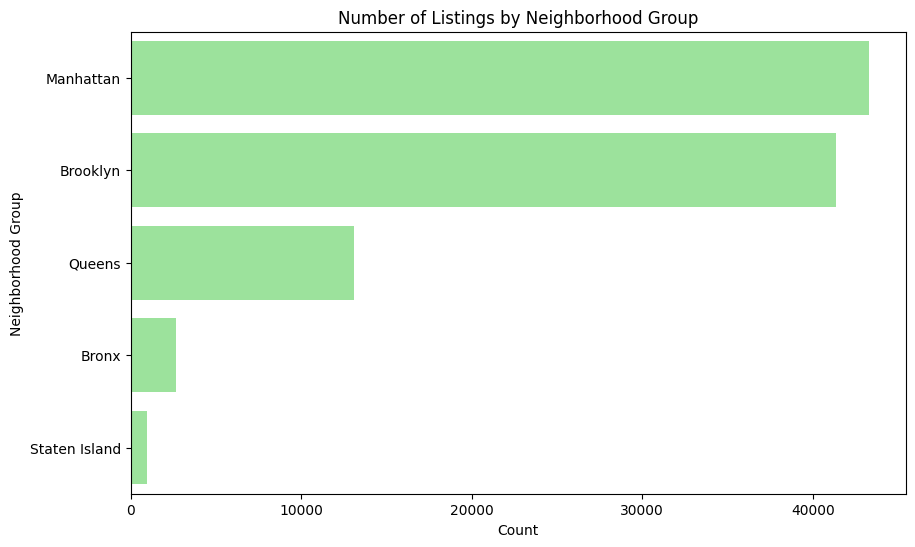

In [22]:
plt.figure(figsize= (10, 6))

sns.countplot(y='neighbourhood group', data=df,color="lightgreen" , order=df ['neighbourhood group']. value_counts () .index)

plt.title( 'Number of Listings by Neighborhood Group')
plt.xlabel('Count')
plt.ylabel('Neighborhood Group')

plt.show()

# **d. What is the relationship between price & roomtype?**


/tmp/ipython-input-23-2347991949.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room type', y='price', data=df, palette='Set2')
/tmp/ipython-input-23-2347991949.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Room Type')


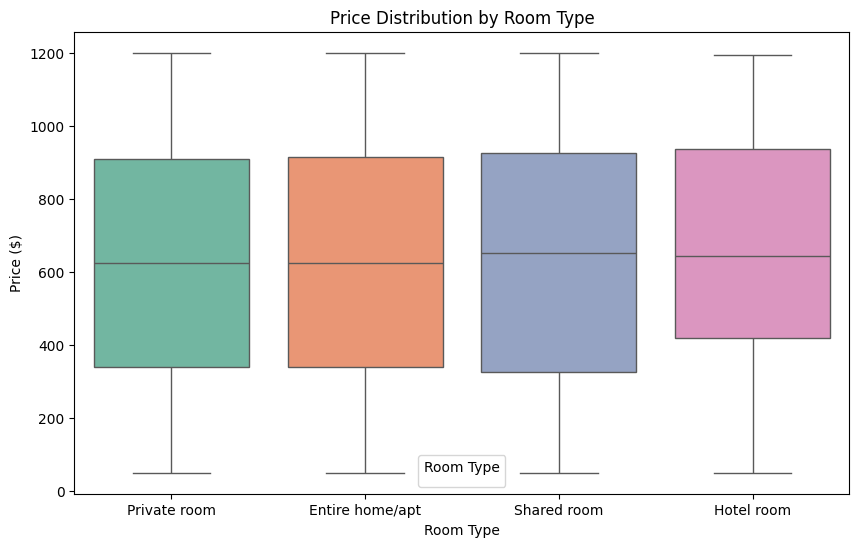

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='price', data=df, palette='Set2')

plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.legend(title='Room Type')

plt.show()

# **e. How has the number of reviews change over time?**

***Answer:***

*   Manhattan > Brooklyn > Queens > Bronx > Staten Island

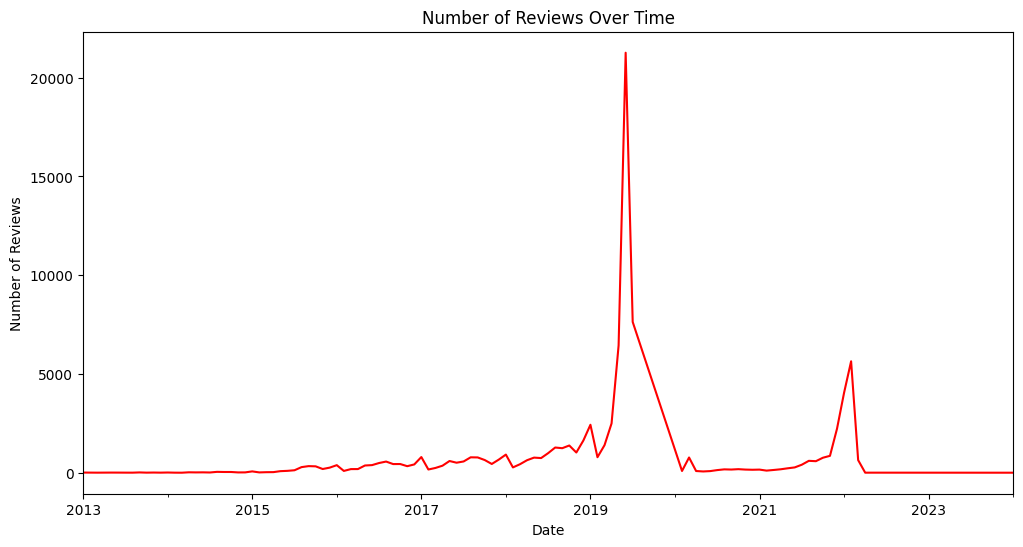

In [33]:
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size ()
## df['last review'].dt   -->.  .dt là datetime accessor để truy cập các thuộc tính của ngày (năm, tháng, quý...).

## .to_period('M')   -->  Chuyển mỗi ngày thành chu kỳ theo tháng. Ví dụ: 2024-07-15 ➜ 2024-07

##   groupby(...)   -->  Gom nhóm dữ liệu theo tháng.

##  .size()  -->  Đếm số bản ghi trong mỗi nhóm.

## Kết quả: Số reviews của mỗi tháng: 2024-01 : 23 , 2024-02 : 45 , ...

plt.figure(figsize=(12, 6))

reviews_over_time.plot(kind='line', color='red')

plt.xlim(['2013', '2024']) #Limit x axis

plt.title ('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')

plt.show()